Getting the first pair of trajectories: T (id=5), T_prime(id=18) from the highway.csv dataset in lane 1...

data for id = 5:
[[ 5.          5.8960606  11.19921242  1.        ]
 [ 5.         10.16242812 11.43158779  1.        ]
 [ 5.         14.71321479 14.48058625  1.        ]
 [ 5.         16.46747353 14.08359399  1.        ]
 [ 5.         20.16505974 14.3877125   1.        ]
 [ 5.         24.58838775 12.87658329  1.        ]
 [ 5.         28.65135402 15.34068367  1.        ]
 [ 5.         33.43515413 15.31196098  1.        ]
 [ 5.         40.36858937 13.92042258  1.        ]
 [ 5.         41.23905658 16.13664265  1.        ]
 [ 5.         46.3013349  12.53529688  1.        ]
 [ 5.         53.16012169 13.41478046  1.        ]
 [ 5.         52.32155026 14.62250731  1.        ]
 [ 5.         58.46022552 13.05233905  1.        ]
 [ 5.         61.58793809 16.84988249  1.        ]
 [ 5.         63.30178227 17.24193698  1.        ]]

data for id = 18:
[[18.          5.1017879  13.79669883  

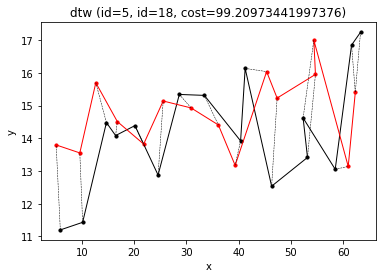

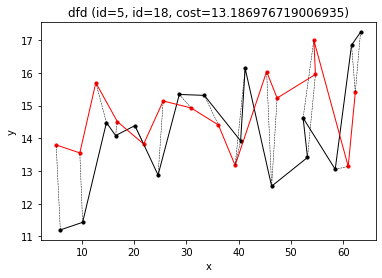

Getting the second pair of trajectories: T (id=28), T_prime(id=22) from the highway.csv dataset in lane 1...
data for id=28:
[[28.          6.77002299 14.84289833  1.        ]
 [28.         11.56743826 17.32097844  1.        ]
 [28.         14.37786087 15.25475107  1.        ]
 [28.         18.23916007 16.20607237  1.        ]
 [28.         20.75560392 12.41395592  1.        ]
 [28.         26.45064384 15.26119952  1.        ]
 [28.         28.50311297 14.27387289  1.        ]
 [28.         38.8159468  13.90255913  1.        ]
 [28.         38.95489113 11.80214307  1.        ]
 [28.         42.10656916 12.28445121  1.        ]
 [28.         45.87566147 14.92149253  1.        ]
 [28.         53.9314677  14.87068141  1.        ]
 [28.         57.32502481 13.21539367  1.        ]
 [28.         62.49272315 13.86878819  1.        ]
 [28.         67.14667362 16.42091699  1.        ]]

data for id=22:
[[22.          6.03008994 14.99049474  1.        ]
 [22.          7.69601769 15.09655835  1.

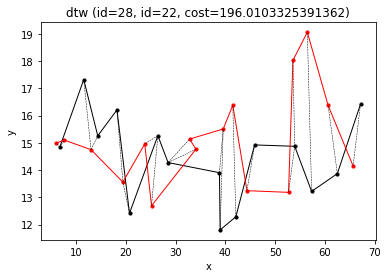

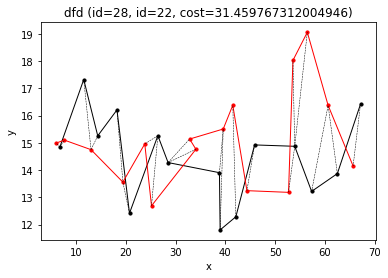

Step3: test the performance of dtw and dfd for speech recognition

DTW:
          unshifted_slow vs shifted_slow has cost 0.007033194724321805
            shifted_slow vs shifted_fast has cost 0.01260756661138179
          unshifted_fast vs shifted_fast has cost 0.012797260407783412
          unshifted_fast vs shifted_slow has cost 0.013663178048497029
          unshifted_slow vs shifted_fast has cost 0.0163374674508397
        unshifted_slow vs unshifted_fast has cost 0.036010436533085194

DFD:
            shifted_slow vs shifted_fast has cost 0.0009000964518104736
          unshifted_slow vs shifted_fast has cost 0.0011369236529042849
          unshifted_slow vs shifted_slow has cost 0.0014628390881429372
          unshifted_fast vs shifted_slow has cost 0.00308091992792797
          unshifted_fast vs shifted_fast has cost 0.0034410817932313638
        unshifted_slow vs unshifted_fast has cost 0.007844554362348403


In [1]:
from Part1 import *
from tools import *
import numpy as np
import pandas
import matplotlib.pyplot as plt
from sklearn.preprocessing import Normalizer

Data_Highway1 = pandas.read_csv("../data/highway.csv")

Data_Highway = read_trajectories("../data/highway.csv")


print('==================================================================================')
print('Getting the first pair of trajectories: T (id=5), T_prime(id=18) from the highway.csv dataset in lane 1...\n')

# id=5
T_5 = Data_Highway[91:107]
print('data for id = 5:\n{:}\n'.format(T_5))

# id=18
T_18 = Data_Highway[308:323]
print('data for id = 18:\n{:}\n'.format(T_18))

# get the cost and assignment for the first pair
distance_dtw_pair_1, path_dtw_pair_1 = dtw(T_5[:, 1:3], T_18[:, 1:3])
print('The dynamic time warping (DTW) cost is: {:}'.format(
    distance_dtw_pair_1))
print('The associated monotone assignment C is:\n{:}\n'.format(
    path_dtw_pair_1))

# get the cost and assignment for the first pair
distance_dfd_pair_1, path_dfd_pair_1 = dfd(T_5[:, 1:3], T_18[:, 1:3])
print('The discrete Fréchet distance (DFD) cost is: {:}'.format(
    distance_dfd_pair_1))
print('The associated monotone assignment C is:\n{:}\n'.format(
    path_dfd_pair_1))

# draw results for first path
draw_assignment(T_5[:, 1:3], T_18[:, 1:3], path_dtw_pair_1, 'dtw (id=5, id=18, cost={:})'.format(
    distance_dtw_pair_1), '../images/part1/dtw_5_18')
draw_assignment(T_5[:, 1:3], T_18[:, 1:3], path_dfd_pair_1, 'dfd (id=5, id=18, cost={:})'.format(
    distance_dfd_pair_1), '../images/part1/dfd_5_18')

print('==================================================================================')
print('Getting the second pair of trajectories: T (id=28), T_prime(id=22) from the highway.csv dataset in lane 1...')

# next pair
T_28 = Data_Highway[481:496]
print('data for id=28:\n{:}\n'.format(T_28))

T_22 = Data_Highway[374:390]
print('data for id=22:\n{:}\n'.format(T_22))
#
# get the cost and assignment for the first pair
distance_dtw_pair_2, path_dtw_pair_2 = dtw(T_28[:, 1:3], T_22[:, 1:3])
print('The dynamic time warping (DTW) cost is: {:}'.format(
    distance_dtw_pair_2))
print('The associated monotone assignment C is:\n{:}\n'.format(
    path_dtw_pair_2))

# get the cost and assignment for the first pair
distance_dfd_pair_2, path_dfd_pair_2 = dfd(T_28[:, 1:3], T_22[:, 1:3])
print('The discrete Fréchet distance (DFD) cost is: {:}'.format(
    distance_dfd_pair_2))
print('The associated monotone assignment C is:\n{:}\n'.format(
    path_dfd_pair_2))
#
# # draw results for first path
draw_assignment(T_28[:, 1:3], T_22[:, 1:3], path_dtw_pair_2, 'dtw (id=28, id=22, cost={:})'.format(
    distance_dtw_pair_2), '../images/part1/dtw_28_22')
draw_assignment(T_28[:, 1:3], T_22[:, 1:3], path_dfd_pair_2, 'dfd (id=28, id=22, cost={:})'.format(
    distance_dfd_pair_2), '../images/part1/dfd_28_22')

print('==================================================================================')
print('Step3: test the performance of dtw and dfd for speech recognition')

def compare_wav(wav1,  wav2, dtw_results, dfd_results):
    # Read data and normalize such that the maximum amplitude is 1
    T1 = pandas.read_csv("../data/voice/"+wav1+".csv")
    T2 = pandas.read_csv("../data/voice/"+wav2+".csv")
    T1 = T1.to_numpy()
    T2 = T2.to_numpy()

    transformer = Normalizer().fit(np.vstack((T1,T2)))
    T1 = transformer.transform(T1)
    T2 = transformer.transform(T2)

    # DTW vs DFD
    dtw_dist, dtw_path = dtw(T1, T2)
    dfd_dist, dfd_path = dfd(T1, T2)
    comparison = "{} vs {}".format(wav1, wav2)
    dtw_results[comparison] = dtw_dist
    dfd_results[comparison] = dfd_dist
    return dtw_results, dfd_results


dtw_results = {}
dfd_results = {}
dtw_results, dfd_results = compare_wav(
    "unshifted_slow", "unshifted_fast", dtw_results, dfd_results)
dtw_results, dfd_results = compare_wav(
    "unshifted_slow", "shifted_slow", dtw_results, dfd_results)
dtw_results, dfd_results = compare_wav(
    "unshifted_slow", "shifted_fast", dtw_results, dfd_results)
dtw_results, dfd_results = compare_wav(
    "unshifted_fast", "shifted_slow", dtw_results, dfd_results)
dtw_results, dfd_results = compare_wav(
    "unshifted_fast", "shifted_fast", dtw_results, dfd_results)
dtw_results, dfd_results = compare_wav(
    "shifted_slow", "shifted_fast", dtw_results, dfd_results)

print("")
print("DTW:")
for k, v in sorted(dtw_results.items(), key=lambda item: item[1]):
    print("{:>40} has cost {}".format(k, v))

print("")
print("DFD:")
for k, v in sorted(dfd_results.items(), key=lambda item: item[1]):
    print("{:>40} has cost {}".format(k, v))
